# Diamond Pricing Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
filename='/content/drive/My Drive/datasets/Diamond_Pricing_Data.csv'
df= pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sr. No.,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326
2,3,0.23,Good,E,VS1,327
3,4,0.29,Premium,I,VS2,334
4,5,0.31,Good,J,SI2,335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sr. No.  53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   price    53940 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


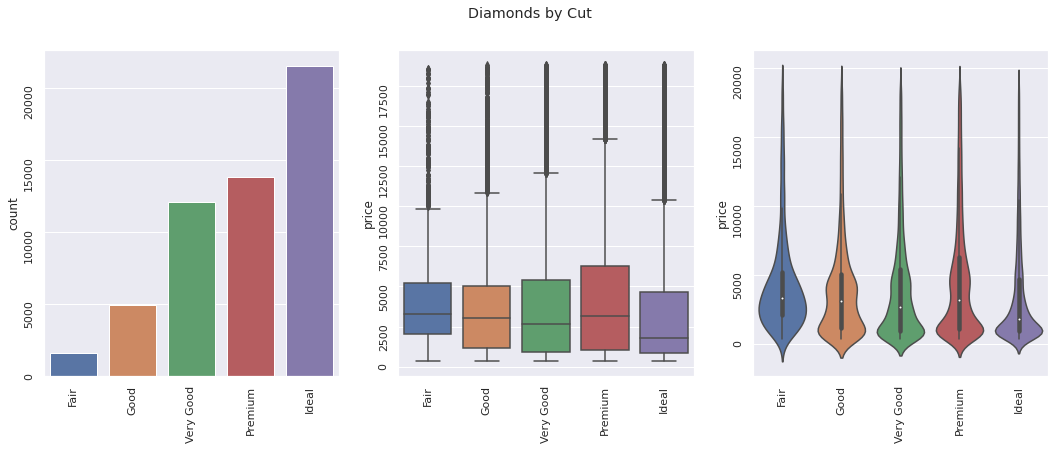

In [ ]:
# Plot by cut
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Cut')
g1=sns.countplot(ax=ax[0],x="cut", data=df,order=['Fair','Good','Very Good','Premium','Ideal'])
g1.set(xlabel=None)
g1.tick_params(labelrotation=90)
g2=sns.boxplot(x="cut", y="price", order=['Fair','Good','Very Good','Premium','Ideal'], data=df, ax=ax[1])
g2.set(xlabel=None)
g2.tick_params(labelrotation=90)
g3=sns.violinplot(ax=ax[2],x="cut", y="price", order=['Fair','Good','Very Good','Premium','Ideal'], data=df,scale='width',legend=False)
g3.set(xlabel=None)
g3.tick_params(labelrotation=90)

# It is seen that most diamonds, given in the dataset, has ideal cut. Juding by pricing, it is seen that the
# premium cut is most expensivwe.

[Text(0.5, 0, '')]

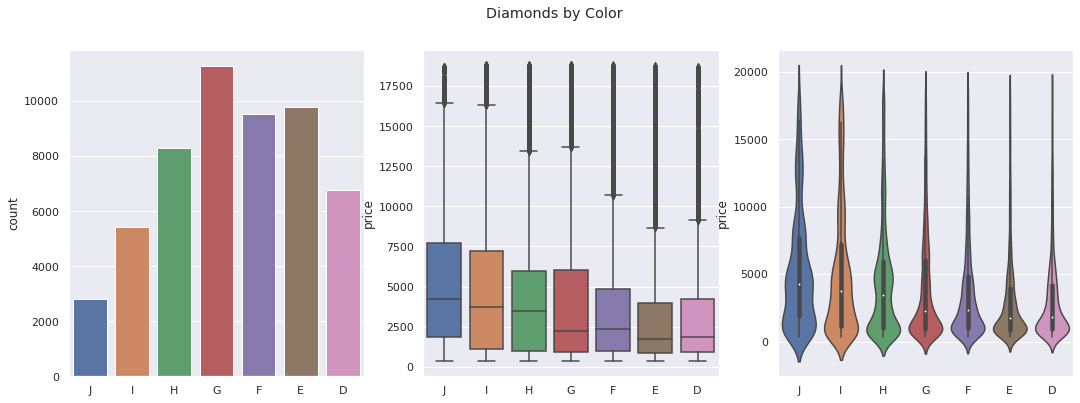

In [ ]:
# Plot by color
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Color')
g1=sns.countplot(ax=ax[0],x="color", data=df.sort_values(by=['color'],ascending=False))
g1.set(xlabel=None)
g2=sns.boxplot(x="color", y="price", data=df.sort_values(by=['color'],ascending=False), ax=ax[1])
g2.set(xlabel=None)
g3=sns.violinplot(ax=ax[2],x="color", y="price", data=df.sort_values(by=['color'],ascending=False),scale='width',legend=False)
g3.set(xlabel=None)

# Most diamonds are in color G, which is then followed by color E, F. Color J and I are most expensive having similar price 
# followed by the colors G and H.

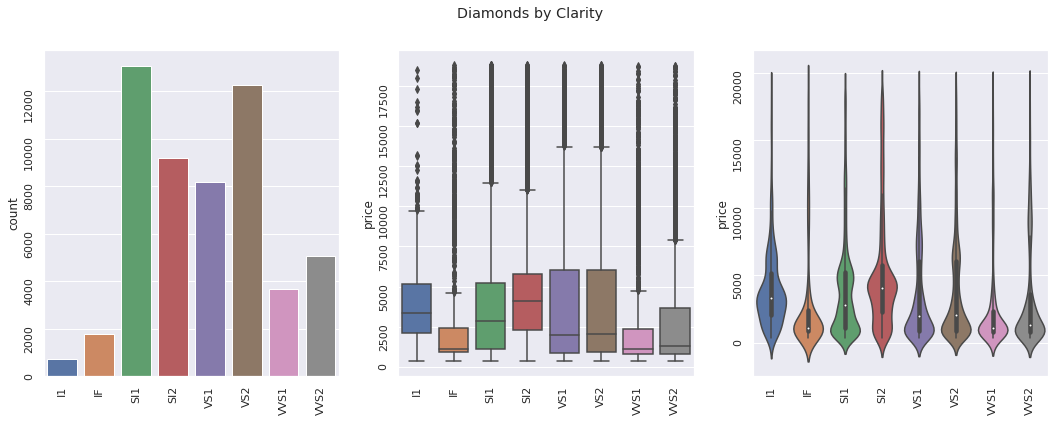

In [ ]:
# Plot by clarity
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Clarity')
g1=sns.countplot(ax=ax[0],x="clarity", data=df.sort_values(by=['clarity']))
g1.set(xlabel=None)
g1.tick_params(labelrotation=90)
g2=sns.boxplot(x="clarity", y="price", data=df.sort_values(by=['clarity']), ax=ax[1])
g2.set(xlabel=None)
g2.tick_params(labelrotation=90)
g3=sns.violinplot(ax=ax[2],x="clarity", y="price", data=df.sort_values(by=['clarity']),scale='width',legend=False)
g3.set(xlabel=None)
g3.tick_params(labelrotation=90)

# Most diamonds has SI1 clarity. Most expensive diamonds have VS1 and VS2 clarity.

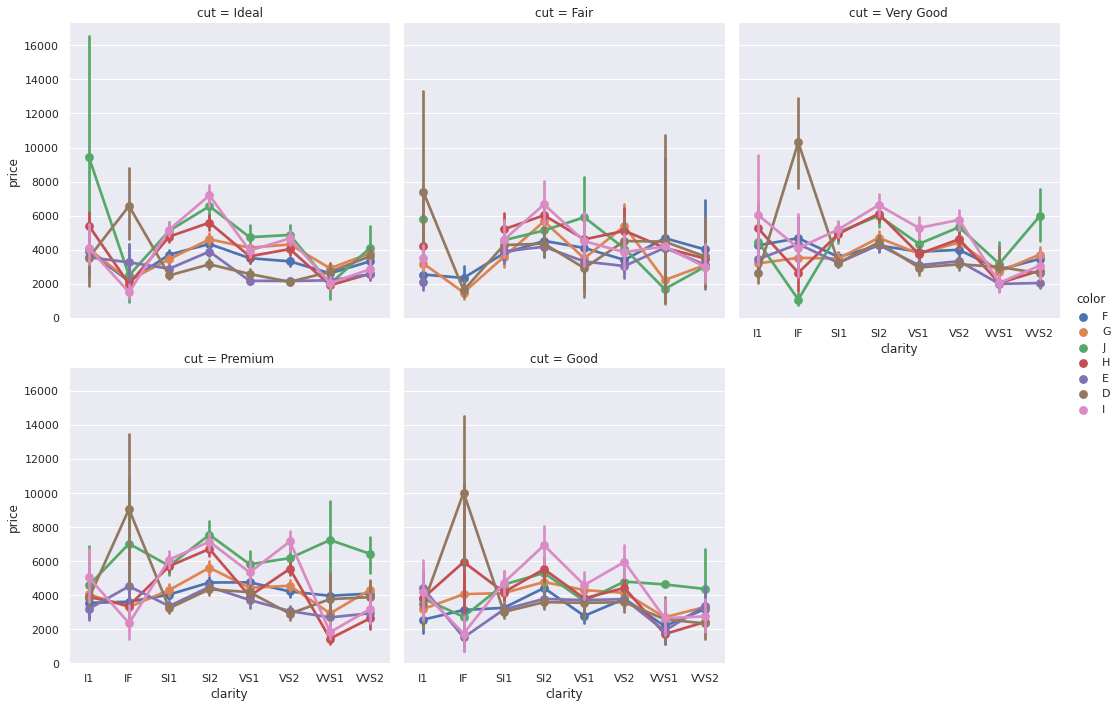

In [ ]:
# Clarity by Cut and Price
sns.set(rc={'figure.figsize':(20,14)})
sns.catplot(x="clarity", y="price", hue="color", kind="point", col ='cut', data=df.sort_values(by=['clarity']),col_wrap=3)

In [ ]:
df.drop(['Sr. No.'], axis=1, inplace=True)

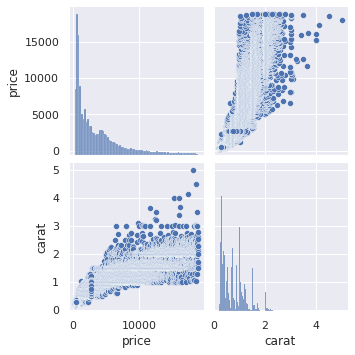

In [ ]:
sns.pairplot(df[['price','carat']])

In [ ]:
# Changing all columns to numeric
cut = pd.get_dummies(df.cut, drop_first = True)
color = pd.get_dummies(df.color, drop_first = True)
clarity = pd.get_dummies(df.clarity, drop_first = True)

df = pd.concat([df, cut, color, clarity], axis = 1)

df.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)

In [ ]:
# Moving the target 'price' to the first column
price_col = df.pop('price')
df.insert(0, price_col.name, price_col)
pd.options.display.max_columns = None
df.head()

,price,carat,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,326,0.23,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,326,0.21,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,327,0.23,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,334,0.29,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,335,0.31,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


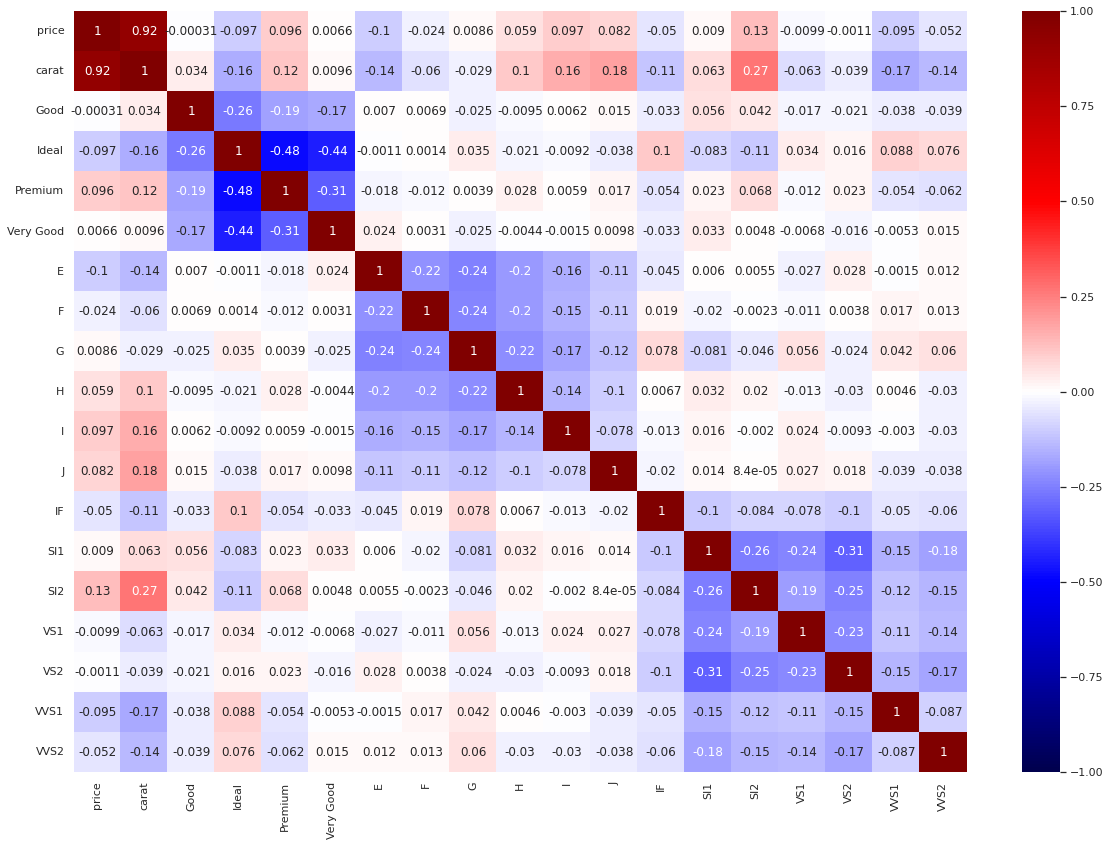

In [ ]:
# Checking the correllation with all features
sns.set(rc={'figure.figsize':(20,14)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [ ]:
# OLS Baseline Regression Model
import statsmodels.api as sm
np.random.seed(0)
y = df.price
X = df.drop(['price'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.264e+04
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:            -4.5699e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53921   BIC:                         9.142e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7362.8022     51.684   -142.458      0.000   -7464.103   -7261.501
carat       8886.1289     12.034    738.437      0.000    8862.543    8909.715
Good         655.7674     33.634     19.497      0.000     589.844     721.690
Ideal        998.2544     30.656     32.563      0.000     938.168    1058.341
Premium      869.3959     30.931     28.108      0.000     808.771     930.021
Very Good    848.7169     31.277     27.135      0.000     787.414     910.020
E           -211.6825     18.316    -11.557      0.000    -247.582    -175.783
F           -303.3100     18.509    -16.387      0.000    -339.589    -267.031
G           -506.1995     18.122    -27.933      0.000    -541.719    -470.680
H           -978.6977     19.272    -50.784      0.000   -1016.471    -940.925
I          -1440.3019     21.646    -66.538      0.000   -1482.729   -1397.875
J          -2325.2224     26.723    -87.013      0.000   -2377.599   -2272.846
IF          5419.6468     52.136    103.952      0.000    5317.460    5521.834
SI1         3573.6880     44.598     80.132      0.000    3486.276    3661.100
SI2         2625.9500     44.788     58.630      0.000    2538.164    2713.736
VS1         4534.8790     45.535     99.591      0.000    4445.630    4624.128
VS2         4217.8291     44.841     94.061      0.000    4129.940    4305.719
VVS1        5072.0276     48.211    105.205      0.000    4977.534    5166.521
VVS2        4967.1994     46.891    105.932      0.000    4875.293    5059.105
==============================================================================
Omnibus:                    15285.474   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183262.957
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                      11.796   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Splitting Into Train and Test Datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 22)

In [ ]:
# Normalizing the Training Dataset
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
num_vars = ['carat','price']
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [ ]:
df_train.describe()

,price,carat,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.194957,0.124486,0.090789,0.397108,0.256979,0.224323,0.181948,0.176757,0.209651,0.152948,0.102124,0.052386,0.033026,0.241618,0.171434,0.150776,0.227025,0.067721,0.094099
std,0.215184,0.098664,0.287312,0.489305,0.436973,0.417141,0.385807,0.381468,0.407065,0.359942,0.302815,0.222808,0.178707,0.428069,0.376893,0.357835,0.418914,0.251269,0.291971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033897,0.041580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.112343,0.103950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.271341,0.174636,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
np.random.seed(0)
y = df_train.price
X = df_train.drop(['price'], axis=1)

y_val = df_test.price
X_val = df_test.drop(['price'], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
#running the OLS model
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 2.248e+04
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:                 50904.
No. Observations:               37758   AIC:                        -1.018e+05
Df Residuals:                   37739   BIC:                        -1.016e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3185      0.003    -97.949      0.000      -0.325      -0.312
carat          2.3026      0.004    613.271      0.000       2.295       2.310
Good           0.0355      0.002     16.398      0.000       0.031       0.040
Ideal          0.0536      0.002     27.230      0.000       0.050       0.057
Premium        0.0468      0.002     23.579      0.000       0.043       0.051
Very Good      0.0459      0.002     22.858      0.000       0.042       0.050
E             -0.0119      0.001     -9.934      0.000      -0.014      -0.010
F             -0.0160      0.001    -13.231      0.000      -0.018      -0.014
G             -0.0272      0.001    -23.023      0.000      -0.030      -0.025
H             -0.0530      0.001    -42.146      0.000      -0.055      -0.051
I             -0.0774      0.001    -55.177      0.000      -0.080      -0.075
J             -0.1251      0.002    -72.048      0.000      -0.128      -0.122
IF             0.2915      0.003     87.062      0.000       0.285       0.298
SI1            0.1934      0.003     67.821      0.000       0.188       0.199
SI2            0.1415      0.003     49.433      0.000       0.136       0.147
VS1            0.2453      0.003     84.208      0.000       0.240       0.251
VS2            0.2282      0.003     79.597      0.000       0.223       0.234
VVS1           0.2751      0.003     89.059      0.000       0.269       0.281
VVS2           0.2680      0.003     89.290      0.000       0.262       0.274
==============================================================================
Omnibus:                    10521.941   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           138680.224
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                      12.186   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Ideal,12.15
12,SI1,8.27
3,Premium,8.07
15,VS2,7.94
4,Very Good,7.27
13,SI2,6.17
14,VS1,5.71
17,VVS2,3.96
1,Good,3.46
0,carat,3.22


In [ ]:
X.drop(['Ideal'], axis=1, inplace=True)

In [ ]:
np.random.seed(0)
X_lm = sm.add_constant(X)
model = sm.OLS(y, X_lm)
results = model.fit()
results.summary()

# we can see that our model achieved a score of 0.913

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 2.331e+04
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:50:16   Log-Likelihood:                 50537.
No. Observations:               37758   AIC:                        -1.010e+05
Df Residuals:                   37740   BIC:                        -1.009e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2816      0.003    -94.350      0.000      -0.287      -0.276
carat          2.2959      0.004    606.880      0.000       2.288       2.303
Good          -0.0137      0.001    -11.369      0.000      -0.016      -0.011
Premium       -0.0024      0.001     -2.913      0.004      -0.004      -0.001
Very Good     -0.0037      0.001     -4.268      0.000      -0.005      -0.002
E             -0.0120      0.001     -9.976      0.000      -0.014      -0.010
F             -0.0165      0.001    -13.575      0.000      -0.019      -0.014
G             -0.0276      0.001    -23.127      0.000      -0.030      -0.025
H             -0.0535      0.001    -42.167      0.000      -0.056      -0.051
I             -0.0775      0.001    -54.688      0.000      -0.080      -0.075
J             -0.1256      0.002    -71.674      0.000      -0.129      -0.122
IF             0.3074      0.003     92.319      0.000       0.301       0.314
SI1            0.2069      0.003     72.968      0.000       0.201       0.212
SI2            0.1541      0.003     54.054      0.000       0.149       0.160
VS1            0.2596      0.003     89.738      0.000       0.254       0.265
VS2            0.2424      0.003     85.156      0.000       0.237       0.248
VVS1           0.2905      0.003     94.744      0.000       0.284       0.297
VVS2           0.2828      0.003     94.873      0.000       0.277       0.289
==============================================================================
Omnibus:                    10204.517   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137139.166
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                      12.151   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Running the model against the test dataset and making predictions
y_train_price = results.predict(X_lm)
# Scaling the test data
df_test_copy = df_test.copy()
num_vars = ['carat','price']
df_test_copy[num_vars] = scalar.fit_transform(df_test_copy[num_vars])

# Running the model against the test features
y_test = df_test_copy['price']
X_test = df_test_copy.drop(['price'], axis=1)

X_test_lm = sm.add_constant(X_test)
X_test_lm.drop(['Ideal'], axis=1, inplace=True)

y_pred = results.predict(X_test_lm)

# Output the R2 score for the test data
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_test, y_pred),4)))
print('R Squared: ' + str(round(r2_score(y_test, y_pred),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_test, y_pred),4)))


Mean Absolute Error: 0.1904
R Squared: -0.2511
Mean Squared Error: 0.059


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y = df['price']
X = df.drop(['price'], axis=1)
np.random.seed(0)
y_train = df_train.price
X_train = df_train.drop(['price'], axis=1)
y_val = df_test.price
X_val = df_test.drop(['price'], axis=1)
num_vars = ['carat','price']
df_test_scaled = df_test.copy()
df_test_scaled[num_vars] = scalar.fit_transform(df_test_scaled[num_vars])

y_val_scaled = df_test_scaled.price
X_val_scaled = df_test_scaled.drop(['price'], axis=1)

In [ ]:
# Lasso Regression
alphavec = 10**np.linspace(-3,3,200) 
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

lasso_model.alpha_ 

0.001

In [ ]:
print("Accuracy: "+ str(round(lasso_model.score(X_train, y_train),4)*100) + '%')
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_val_scaled, lasso_model.predict(X_val_scaled)),4)))
print('R Squared: ' + str(round(r2_score(y_val_scaled, lasso_model.predict(X_val_scaled)),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_val_scaled, lasso_model.predict(X_val_scaled)),4)))

Accuracy: 88.75999999999999%
Mean Absolute Error: 0.1683
R Squared: 0.0146
Mean Squared Error: 0.0465


In [ ]:
# Ridge Regression
alphavec = 10**np.linspace(-3,3,200)
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train, y_train)
ridge_model.alpha_

0.012173827277396614

In [ ]:
print("Accuracy: "+ str(round(ridge_model.score(X_train, y_train),4)*100) + '%')
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_val_scaled, ridge_model.predict(X_val_scaled)),4)))
print('R Squared: ' + str(round(r2_score(y_val_scaled, ridge_model.predict(X_val_scaled)),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_val_scaled, ridge_model.predict(X_val_scaled)),4)))

Accuracy: 91.47%
Mean Absolute Error: 0.1911
R Squared: -0.2584
Mean Squared Error: 0.0594


In [ ]:
#Elastic Net Regression
alphavec = 10**np.linspace(-3,3,200)
elasticnet_model = ElasticNetCV(alphas = alphavec, cv=5)
elasticnet_model.fit(X_train, y_train)
elasticnet_model.alpha_

0.001

In [ ]:
print("Accuracy: "+ str(round(elasticnet_model.score(X_train, y_train),4)*100) + '%')
print("Mean Absolute Error: "+ str(round(mean_absolute_error(y_val_scaled, elasticnet_model.predict(X_val_scaled)),4)))
print('R Squared: ' + str(round(r2_score(y_val_scaled, elasticnet_model.predict(X_val_scaled)),4)) )
print('Mean Squared Error: ' + str(round(mean_squared_error(y_val_scaled, elasticnet_model.predict(X_val_scaled)),4)))

Accuracy: 89.12%
Mean Absolute Error: 0.1656
R Squared: 0.0742
Mean Squared Error: 0.0437


In [ ]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Creating Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Combine scaled X and y
X_scaled = X_train.copy().append(X_val_scaled)
y_scaled = y_train.copy().append(y_val_scaled)

# Splitting data to k-folds and impemement K-fold validation
kf = KFold(n_splits=10, shuffle=True, random_state = 1)

# Linear model with selected features
cvs_lm = cross_val_score(lm, X_scaled.drop(['Good'],axis=1), y_scaled, cv=kf, scoring='r2')
print(cvs_lm)
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3) )

cvs_ridge = cross_val_score(ridge_model, X_scaled, y_scaled, cv=kf, scoring='r2')
print(cvs_ridge)
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3) )

cvs_lasso = cross_val_score(lasso_model, X_scaled, y_scaled, cv=kf, scoring='r2')
print(cvs_lasso)
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3) )

cvs_elasticnet = cross_val_score(elasticnet_model, X_scaled, y_scaled, cv=kf, scoring='r2')
print(cvs_elasticnet)
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3) )

[0.76668276 0.76582421 0.76935331 0.77352484 0.76616924 0.76774425
 0.78115435 0.7636756  0.77223114 0.77375508]
Linear regression cv R^2: 0.77 +- 0.005
[0.75450501 0.75621952 0.75654047 0.76141409 0.75401641 0.75988459
 0.76978107 0.75129757 0.76427435 0.76348549]
Ridge regression cv R^2: 0.759 +- 0.005
[0.7363396  0.73869998 0.74097548 0.74553929 0.73873473 0.74647138
 0.75602821 0.73064986 0.74838625 0.74804963]
Lasso regression cv R^2: 0.743 +- 0.007
[0.74791647 0.75020755 0.75214754 0.75583841 0.74918625 0.75638497
 0.76628008 0.7440259  0.75886443 0.75790645]
ElasticNet regression cv R^2: 0.754 +- 0.006


# Vehicle Insurance Premium Pricing

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [93]:
from google.colab import drive
drive.mount('/content/drive')
filename2='/content/drive/My Drive/datasets/Vehicle_Insurance_Claim_Records.csv'
df2= pd.read_csv(filename2)
df2.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,OCCUPATION,TRAVTIME,CAR_USE,CAR_VALUE,CAR_TYPE,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY
0,100130023,0,05-02-55,2,13,"26,763",Yes,"141,019",No,F,...,Manager,49,Private,"11,500",SUV,0,0,0,11,Highly Urban/ Urban
1,100263241,0,05-10-61,0,9,"156,060",No,"381,438",Yes,M,...,Blue Collar,29,Commercial,"25,230",Panel Truck,"8,207",1,0,9,Highly Urban/ Urban
2,100321982,0,12-11-59,1,11,"1,965",Yes,0,No,F,...,Home Maker,21,Private,"20,630",Minivan,0,0,0,11,Highly Urban/ Urban
3,100391818,0,11-10-61,1,10,"62,361",No,"185,738",Yes,F,...,Home Maker,32,Private,"11,540",SUV,"3,481",1,0,6,Highly Urban/ Urban
4,100549277,0,06-10-66,1,10,"34,192",Yes,0,No,F,...,Blue Collar,22,Commercial,"13,670",SUV,0,0,0,7,Highly Rural/ Rural


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          7647 non-null   int64 
 1   KIDSDRIV    7647 non-null   int64 
 2   BIRTH       7647 non-null   object
 3   HOMEKIDS    7647 non-null   int64 
 4   YOJ         7647 non-null   int64 
 5   INCOME      7647 non-null   object
 6   PARENT1     7647 non-null   object
 7   HOME_VAL    7647 non-null   object
 8   MSTATUS     7647 non-null   object
 9   GENDER      7647 non-null   object
 10  EDUCATION   7647 non-null   object
 11  OCCUPATION  7647 non-null   object
 12  TRAVTIME    7647 non-null   int64 
 13  CAR_USE     7647 non-null   object
 14  CAR_VALUE   7647 non-null   object
 15  CAR_TYPE    7647 non-null   object
 16  OLDCLAIM    7647 non-null   object
 17  CLM_FREQ    7647 non-null   int64 
 18  CLM_AMT     7647 non-null   object
 19  CAR_AGE     7647 non-null   int64 
 20  URBANICI

In [36]:
df2.isnull().sum()

ID            0
KIDSDRIV      0
BIRTH         0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
CAR_VALUE     0
CAR_TYPE      0
OLDCLAIM      0
CLM_FREQ      0
CLM_AMT       0
CAR_AGE       0
URBANICITY    0
dtype: int64

In [37]:
df2.shape

(7647, 21)

In [94]:
gender = pd.get_dummies(df2.GENDER, drop_first = True)
mstatus = pd.get_dummies(df2.MSTATUS, drop_first = True)
education = pd.get_dummies(df2.EDUCATION, drop_first = True)
parent = pd.get_dummies(df2.PARENT1, drop_first = True)
occupation = pd.get_dummies(df2.OCCUPATION, drop_first = True)
car_use = pd.get_dummies(df2.CAR_USE, drop_first = True)
car_type = pd.get_dummies(df2.CAR_TYPE, drop_first = True)
urbanicity = pd.get_dummies(df2.URBANICITY, drop_first = True)

df2 = pd.concat([df2, gender, mstatus, education, parent, occupation, car_use, car_type, urbanicity], axis = 1)

df2.drop(['GENDER', 'MSTATUS', 'EDUCATION', 'PARENT1', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'URBANICITY' ], axis = 1, inplace = True)
df2

,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,...,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Urban/ Urban
0,100130023,0,05-02-55,2,13,"26,763","141,019",49,"11,500",0,...,1,0,0,1,0,0,1,0,0,1
1,100263241,0,05-10-61,0,9,"156,060","381,438",29,"25,230","8,207",...,0,0,0,0,1,0,0,0,0,1
2,100321982,0,12-11-59,1,11,"1,965",0,21,"20,630",0,...,0,0,0,1,0,0,0,0,0,1
3,100391818,0,11-10-61,1,10,"62,361","185,738",32,"11,540","3,481",...,0,0,0,1,0,0,1,0,0,1
4,100549277,0,06-10-66,1,10,"34,192",0,22,"13,670",0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,999532945,0,28-08-38,0,11,"67,813","249,997",51,"21,190",0,...,0,1,0,1,0,0,0,1,0,0
7643,999575184,0,24-12-68,2,11,"13,490","95,447",5,"5,850","31,401",...,0,0,1,0,0,1,0,0,0,1
7644,999612102,0,27-03-57,1,11,"44,955","161,808",30,"18,790",0,...,0,1,0,1,0,0,0,0,0,1
7645,999756883,0,09-06-51,0,13,"36,835","167,142",20,"17,360","32,434",...,0,0,0,0,0,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


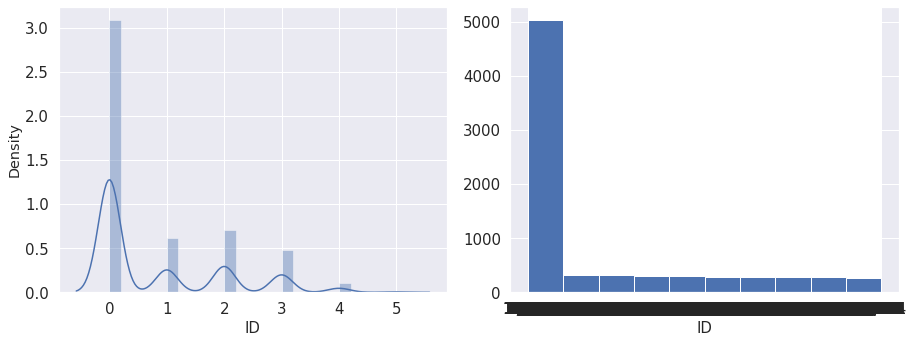

In [39]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df2['CLM_FREQ'],ax=ax2)
ax2.set_xlabel('ID', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['OLDCLAIM'])
ax3.set_xlabel('ID', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

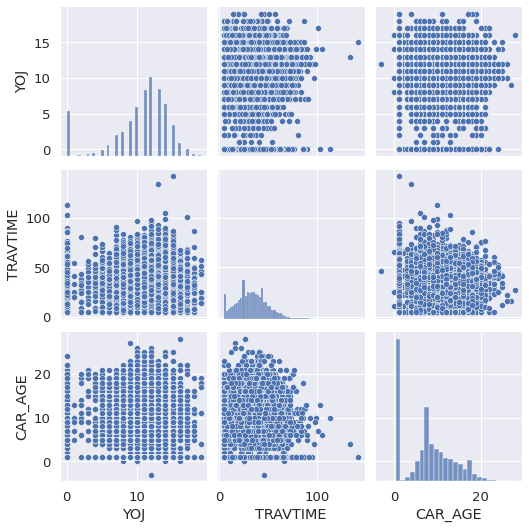

In [40]:
sns.pairplot(df2[['YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'CAR_VALUE', 'CAR_AGE']])

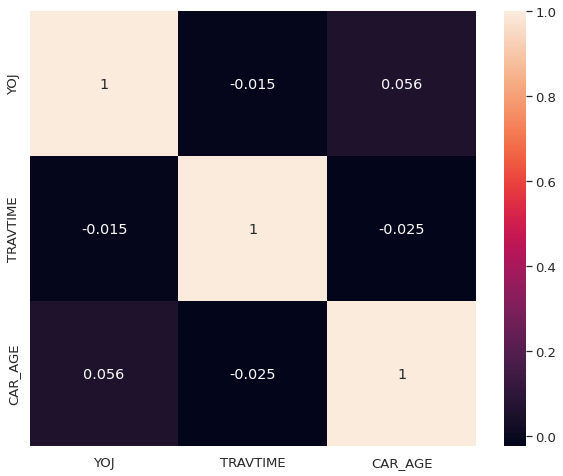

In [41]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2[['YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'CAR_VALUE', 'CAR_AGE']].corr(), annot=True)

In [95]:
df2 = df2.drop(['BIRTH'], axis =1)
df2

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,CLM_FREQ,...,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Urban/ Urban
0,100130023,0,2,13,"26,763","141,019",49,"11,500",0,0,...,1,0,0,1,0,0,1,0,0,1
1,100263241,0,0,9,"156,060","381,438",29,"25,230","8,207",1,...,0,0,0,0,1,0,0,0,0,1
2,100321982,0,1,11,"1,965",0,21,"20,630",0,0,...,0,0,0,1,0,0,0,0,0,1
3,100391818,0,1,10,"62,361","185,738",32,"11,540","3,481",1,...,0,0,0,1,0,0,1,0,0,1
4,100549277,0,1,10,"34,192",0,22,"13,670",0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,999532945,0,0,11,"67,813","249,997",51,"21,190",0,0,...,0,1,0,1,0,0,0,1,0,0
7643,999575184,0,2,11,"13,490","95,447",5,"5,850","31,401",3,...,0,0,1,0,0,1,0,0,0,1
7644,999612102,0,1,11,"44,955","161,808",30,"18,790",0,0,...,0,1,0,1,0,0,0,0,0,1
7645,999756883,0,0,13,"36,835","167,142",20,"17,360","32,434",2,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df2 = df2.replace(',', '', regex=True).astype(int)
df2

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,CLM_FREQ,...,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van,Highly Urban/ Urban
0,100130023,0,2,13,26763,141019,49,11500,0,0,...,1,0,0,1,0,0,1,0,0,1
1,100263241,0,0,9,156060,381438,29,25230,8207,1,...,0,0,0,0,1,0,0,0,0,1
2,100321982,0,1,11,1965,0,21,20630,0,0,...,0,0,0,1,0,0,0,0,0,1
3,100391818,0,1,10,62361,185738,32,11540,3481,1,...,0,0,0,1,0,0,1,0,0,1
4,100549277,0,1,10,34192,0,22,13670,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,999532945,0,0,11,67813,249997,51,21190,0,0,...,0,1,0,1,0,0,0,1,0,0
7643,999575184,0,2,11,13490,95447,5,5850,31401,3,...,0,0,1,0,0,1,0,0,0,1
7644,999612102,0,1,11,44955,161808,30,18790,0,0,...,0,1,0,1,0,0,0,0,0,1
7645,999756883,0,0,13,36835,167142,20,17360,32434,2,...,0,0,0,0,0,0,0,0,0,1


In [97]:
X1 = df2.drop(['Highly Urban/ Urban'], axis = 1)
y1 = df2.pop("Highly Urban/ Urban")
X1.head()

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,CAR_VALUE,OLDCLAIM,CLM_FREQ,...,Lawyer,Manager,Professional,Student,Private,Panel Truck,Pickup,SUV,Sports Car,Van
0,100130023,0,2,13,26763,141019,49,11500,0,0,...,0,1,0,0,1,0,0,1,0,0
1,100263241,0,0,9,156060,381438,29,25230,8207,1,...,0,0,0,0,0,1,0,0,0,0
2,100321982,0,1,11,1965,0,21,20630,0,0,...,0,0,0,0,1,0,0,0,0,0
3,100391818,0,1,10,62361,185738,32,11540,3481,1,...,0,0,0,0,1,0,0,1,0,0
4,100549277,0,1,10,34192,0,22,13670,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=5)

In [102]:
print('X1_train',X1_train.shape)
print('X1_test',X1_test.shape)
print('y1_train',y1_train.shape)
print('y1_test',y1_test.shape)

X1_train (5352, 32)
X1_test (2295, 32)
y1_train (5352,)
y1_test (2295,)


In [103]:
model1 = tree.DecisionTreeClassifier()
model1.fit(X1_train, y1_train) 

DecisionTreeClassifier()

In [106]:
model1.predict(X1_test)

array([1, 1, 0, ..., 0, 1, 1])

In [109]:
model1.score(X1_test, y1_test)

0.7660130718954249

In [112]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X1_train,y1_train)
lr_clf.score(X1_test,y1_test)

0.17769342039835923

In [124]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeClassifier(), X1, y1, cv=cv)

array([0.78954248, 0.7875817 , 0.77124183, 0.78954248, 0.7751634 ])

In [125]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier(), X1, y1, cv=cv)

array([0.83529412, 0.84052288, 0.84248366, 0.8254902 , 0.83137255])

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':['gini', 'entropy'],
                'splitter':['best', 'random']
            }
        },
        'random forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ["gini", "entropy"]
            }
        },

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X1,y1)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X1,y1)

,model,best_score,best_params
0,linear_regression,0.778824,"{'criterion': 'entropy', 'splitter': 'best'}"
1,random forest,0.836950,{'criterion': 'entropy'}


# Classify Riders without helmets


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories=['helmet','helmet-less']
input_data=[]
target_data=[]
dir_data='/content/drive/MyDrive/Helmets_Data/3_classify'

dir_data

In [ ]:
for i in categories:
    path=os.path.join(dir_data,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))  
        img_resized=resize(img_array,(150,150,3))
        input_data.append(img_resized.flatten())
        target_data.append(categories.index(i))
    print(f'loaded category:{i} successfully')